# Real Estate Scraping 

https://www.realestate.com.au/sold/property-unit+apartment-with-2-bedrooms-in-leichhardt,+nsw+2040/list-1?maxBeds=2&activeSort=solddate

## Access a webpage

Using the requests library

In [1]:
url = "https://www.realestate.com.au/sold/property-unit+apartment-with-2-bedrooms-in-leichhardt,+nsw+2040/list-1?maxBeds=2&activeSort=solddate"

In [2]:
import requests

response = requests.get(url)

In [3]:
response.text

'<!doctype html>\n<html lang="en-AU">\n<head>\n    <meta charset="utf-8"/>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1">\n    <meta name="format-detection" content="telephone=no">\n    <title data-react-helmet="true">Leichhardt, NSW 2040 Sold Apartment &amp; Unit Prices &amp; Auction Results - realestate.com.au</title> <link data-react-helmet="true" rel="canonical" href="https://www.realestate.com.au/sold/property-unit+apartment-with-2-bedrooms-in-leichhardt,+nsw+2040/list-1"/><link data-react-helmet="true" href="https://m.realestate.com.au/sold/property-unit+apartment-with-2-bedrooms-in-leichhardt,+nsw+2040/list-1" rel="alternate" media="only screen and (max-width: 640px)"/><link data-react-helmet="true" rel="next" href="/sold/property-unit+apartment-with-2-bedrooms-in-leichhardt,+nsw+2040/list-2?maxBeds=2&amp;activeSort=solddate"/> <meta data-react-helmet="true" nam

## Query the contents of a webpage

Using BeautifulSoup

In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, "html5lib")

In [5]:
soup

<!DOCTYPE html>
<html lang="en-AU"><head>
    <meta charset="utf-8"/>
    <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
    <meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1" name="viewport"/>
    <meta content="telephone=no" name="format-detection"/>
    <title data-react-helmet="true">Leichhardt, NSW 2040 Sold Apartment &amp; Unit Prices &amp; Auction Results - realestate.com.au</title> <link data-react-helmet="true" href="https://www.realestate.com.au/sold/property-unit+apartment-with-2-bedrooms-in-leichhardt,+nsw+2040/list-1" rel="canonical"/><link data-react-helmet="true" href="https://m.realestate.com.au/sold/property-unit+apartment-with-2-bedrooms-in-leichhardt,+nsw+2040/list-1" media="only screen and (max-width: 640px)" rel="alternate"/><link data-react-helmet="true" href="/sold/property-unit+apartment-with-2-bedrooms-in-leichhardt,+nsw+2040/list-2?maxBeds=2&amp;activeSort=solddate" rel="next"/> <meta content="Browse Leichhardt, NSW 2040

## Get the properties

Let's have a look on the website again and see what we can work out...

In [6]:
properties = soup.find_all('article', class_='residential-card')
properties

[<article aria-label="70/23-25 Norton Street, Leichhardt" class="results-card residential-card residential-card--compressed-view" data-reactid="85"><a class="details-link residential-card__details-link" data-reactid="86" href="/sold/property-apartment-nsw-leichhardt-126919022"><div aria-label="Ray White - Marrickvile" class="branding branding--extra-small " data-reactid="87" role="text" style="background-color:#ffe512;"><img alt="Ray White - Marrickvile" aria-hidden="true" data-reactid="88" src="https://i2.au.reastatic.net//agencylogo/VBQLYJ/12/20170429082148.gif"/></div><div aria-hidden="true" class="residential-card__image-wrapper" data-reactid="89"><div class="residential-card__image" data-reactid="90"><div class="carousel carousel--unmounted residential-card__images property-card-hero property-card-hero--extra-small" data-reactid="91"><div class="property-image" data-reactid="92"><img alt="70/23-25 Norton Street, Leichhardt, NSW 2040" class="property-image__img " data-reactid="93" 

## Get the property sale dates

In [7]:
import dateutil.parser as dparser
sold_dates = [p.find(class_='residential-card__with-comma') for p in properties]
sold_dates = [dparser.parse(p.span.text, fuzzy=True) for p in sold_dates]
sold_dates

[datetime.datetime(2018, 6, 22, 0, 0),
 datetime.datetime(2018, 6, 8, 0, 0),
 datetime.datetime(2018, 5, 30, 0, 0),
 datetime.datetime(2018, 5, 24, 0, 0),
 datetime.datetime(2018, 5, 22, 0, 0),
 datetime.datetime(2018, 5, 8, 0, 0),
 datetime.datetime(2018, 4, 20, 0, 0),
 datetime.datetime(2018, 4, 20, 0, 0),
 datetime.datetime(2018, 2, 12, 0, 0),
 datetime.datetime(2018, 1, 23, 0, 0),
 datetime.datetime(2017, 12, 22, 0, 0),
 datetime.datetime(2017, 12, 11, 0, 0),
 datetime.datetime(2017, 10, 27, 0, 0),
 datetime.datetime(2017, 10, 18, 0, 0),
 datetime.datetime(2017, 10, 4, 0, 0),
 datetime.datetime(2017, 8, 24, 0, 0),
 datetime.datetime(2017, 8, 23, 0, 0),
 datetime.datetime(2017, 7, 24, 0, 0),
 datetime.datetime(2017, 6, 10, 0, 0),
 datetime.datetime(2017, 6, 3, 0, 0),
 datetime.datetime(2017, 5, 26, 0, 0),
 datetime.datetime(2017, 5, 24, 0, 0),
 datetime.datetime(2017, 5, 24, 0, 0),
 datetime.datetime(2017, 5, 20, 0, 0),
 datetime.datetime(2017, 5, 11, 0, 0)]

## Get the property prices

In [8]:
prices = [p.find('span', class_='property-price').text for p in properties]
prices

['Contact agent',
 'Contact agent',
 'Contact agent',
 '$1,125,000',
 '$1,050,000',
 'Contact agent',
 'Contact agent',
 '$700,000',
 '$840,000',
 '$1,024,000',
 'Contact agent',
 'Contact agent',
 '$1,150,000',
 '$1,000,000',
 '$1,135,000',
 'Contact agent',
 '$835,000',
 '$1,080,000',
 '$671,000',
 '$1,118,000',
 '$1,250,000',
 '$1,265,000',
 '$1,150,000',
 '$646,000',
 '$911,000']

## Put the data into pandas

In [9]:
import pandas as pd

df = pd.DataFrame({'price': prices, 'date': sold_dates})
df

,price,date
0,Contact agent,2018-06-22
1,Contact agent,2018-06-08
2,Contact agent,2018-05-30
3,"$1,125,000",2018-05-24
4,"$1,050,000",2018-05-22
5,Contact agent,2018-05-08
6,Contact agent,2018-04-20
7,"$700,000",2018-04-20
8,"$840,000",2018-02-12
9,"$1,024,000",2018-01-23


# Clean your data

In [13]:
import numpy as np
import locale
locale.setlocale(locale.LC_ALL,'')

df.price = df.price.apply(lambda x: (locale.atof(x.strip('$')) if not x.startswith("Contact agent") else np.NaN))
df

,price,date
0,NaN,2018-06-22
1,NaN,2018-06-08
2,NaN,2018-05-30
3,1125000.0,2018-05-24
4,1050000.0,2018-05-22
5,NaN,2018-05-08
6,NaN,2018-04-20
7,700000.0,2018-04-20
8,840000.0,2018-02-12
9,1024000.0,2018-01-23


In [14]:
filtered = df.dropna()

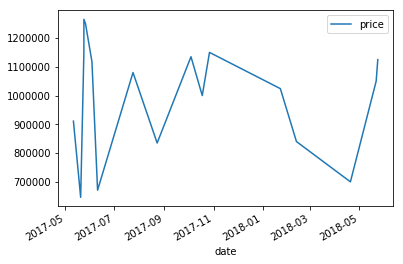

In [15]:
filtered.plot(x='date',y='price')

# Putting it all together...

In [18]:
def parse_price(text):
    try:
        return locale.atof(text.strip('$'))
    except:
        np.NaN
        
def get_page(page_number):
    url = f'https://www.realestate.com.au/sold/property-unit+apartment-with-2-bedrooms-in-leichhardt,+nsw+2040/list-{page_number}?maxBeds=2&activeSort=solddate"'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html5lib")
    articles = soup.find_all('article', class_='residential-card')
    sold_dates = [a.find(class_='residential-card__with-comma') for a in articles]
    sold_dates = [dparser.parse(a.span.text, fuzzy=True) for a in sold_dates]
    prices = [a.find('span', class_='property-price').text for a in articles]
    
    df = pd.DataFrame({'price': prices, 'date': sold_dates})
    df.price = df.price.apply(parse_price)
    filtered = df.dropna()
    return filtered

In [19]:
results = pd.concat(get_page(i) for i in range(1,10))

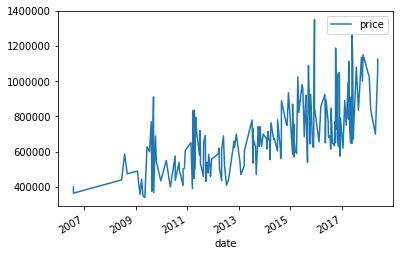

In [20]:
results.sort_values(by=['date']).plot(x='date',y='price')